In [ ]:
import sys
from pathlib import Path

# Get the project root (assuming this notebook is inside /notebooks)
project_root = Path.cwd().parent

sys.path.append(str(project_root))

from src.extract import load_csv

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from src.extract import load_csv

sns.set(style="whitegrid", palette="muted")
pd.set_option("display.max_columns", None)

df = load_csv("listings_cleaned.csv", folder="processed")

df


In [6]:
missing = df.isnull().mean().sort_values(ascending=False)
missing.head(20)


bedrooms                       0.207050
host_response_rate             0.188494
host_response_time             0.188494
review_scores_location         0.152961
review_scores_value            0.152961
review_scores_cleanliness      0.152905
review_scores_communication    0.152905
last_review                    0.152848
reviews_per_month              0.152848
first_review                   0.152848
review_scores_rating           0.152848
host_acceptance_rate           0.130231
host_is_superhost              0.035646
host_total_listings_count      0.000113
host_listings_count            0.000113
host_since                     0.000113
host_identity_verified         0.000113
availability_90                0.000000
number_of_reviews              0.000000
accommodates                   0.000000
dtype: float64

Text(0.5, 1.0, 'Missing Values Heatmap')

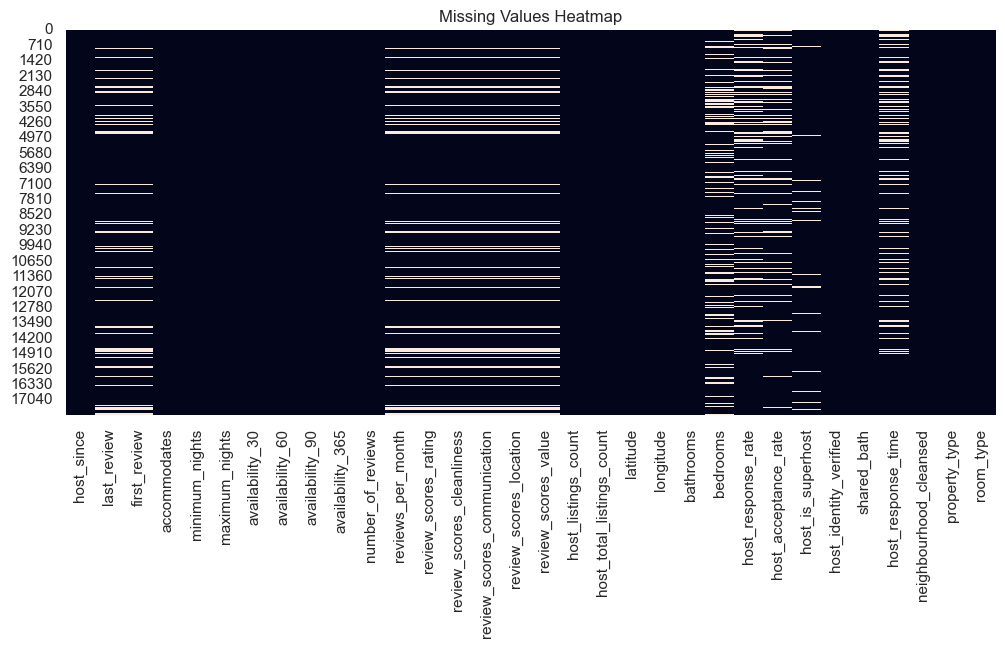

In [7]:
plt.figure(figsize=(12,5))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")


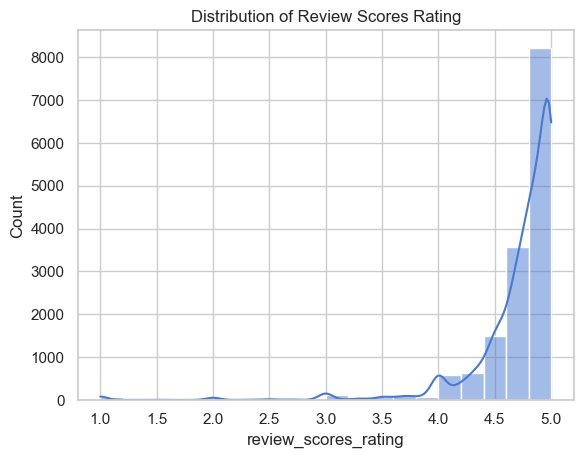

In [8]:
sns.histplot(df["review_scores_rating"], bins=20, kde=True)
plt.title("Distribution of Review Scores Rating")
plt.show()

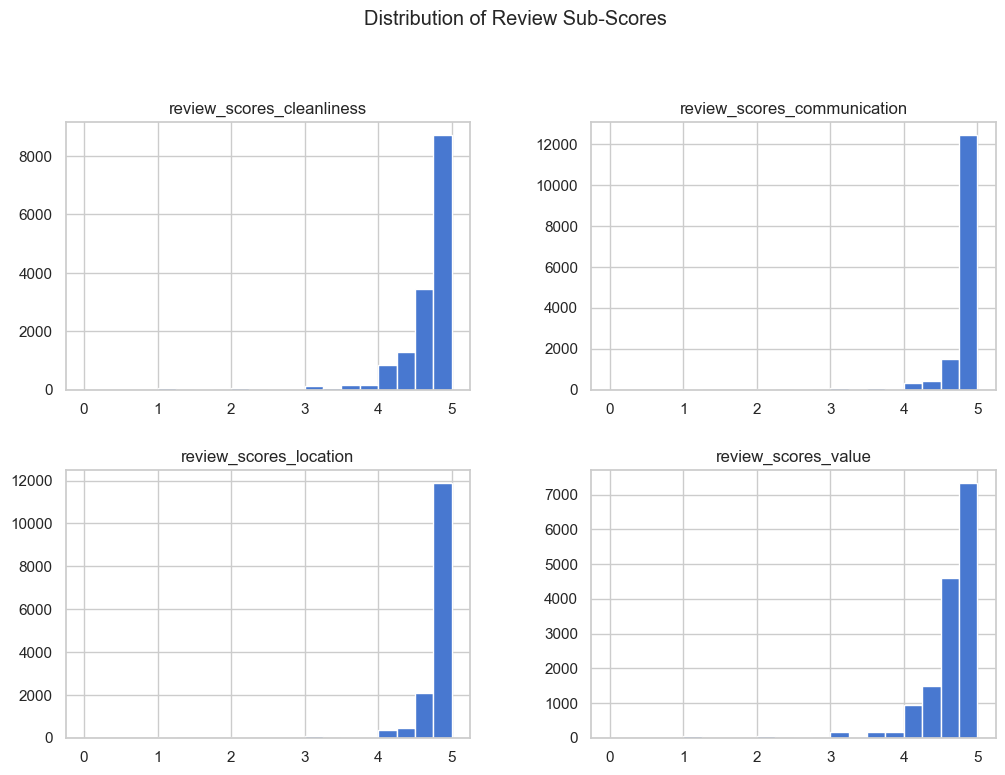

In [10]:
score_cols = [
    
    "review_scores_cleanliness",
    "review_scores_communication",
    "review_scores_location",
    "review_scores_value"
]

df[score_cols].hist(bins=20, figsize=(12,8))
plt.suptitle("Distribution of Review Sub-Scores", y=1.02)
plt.show()

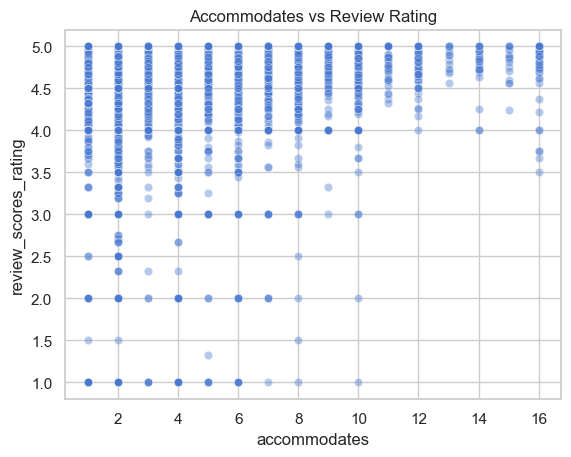

In [11]:
sns.scatterplot(data=df, x="accommodates", y="review_scores_rating", alpha=0.4)
plt.title("Accommodates vs Review Rating")
plt.show()


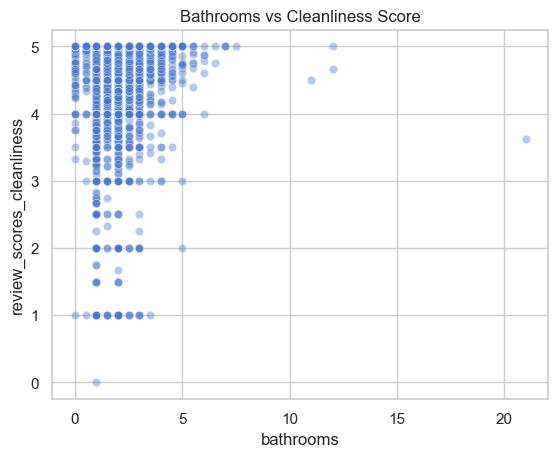

In [12]:
sns.scatterplot(data=df, x="bathrooms", y="review_scores_cleanliness", alpha=0.4)
plt.title("Bathrooms vs Cleanliness Score")
plt.show()


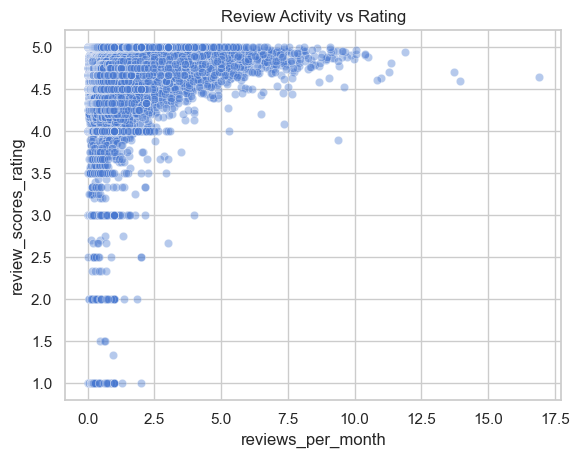

In [13]:
sns.scatterplot(data=df, x="reviews_per_month", y="review_scores_rating", alpha=0.4)
plt.title("Review Activity vs Rating")
plt.show()


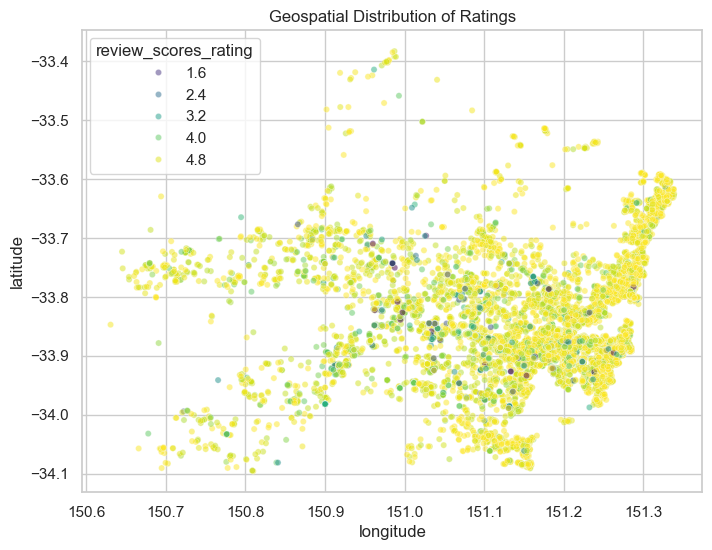

In [16]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df, 
    x="longitude", y="latitude",
    hue="review_scores_rating",
    palette="viridis", alpha=0.5, s=20
)
plt.title("Geospatial Distribution of Ratings")
plt.show()

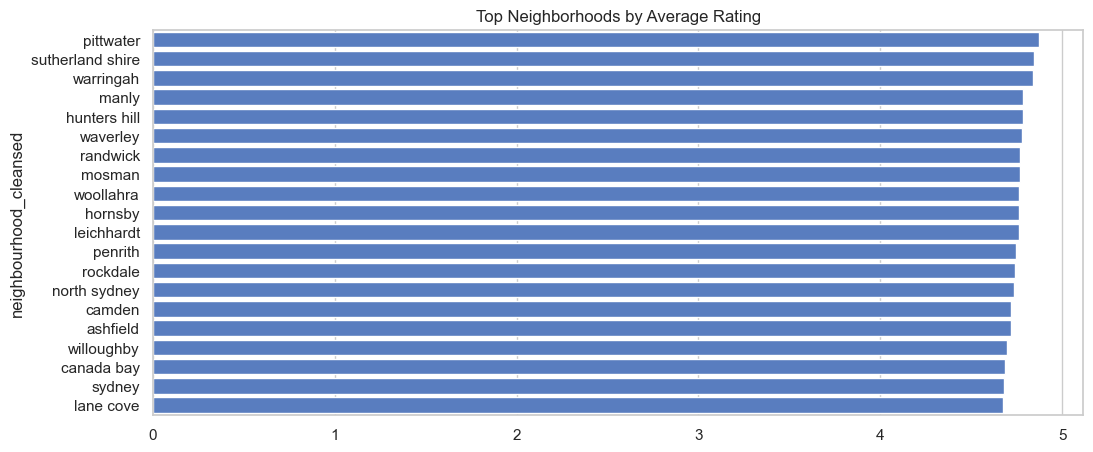

In [15]:
neigh_avg = df.groupby("neighbourhood_cleansed")["review_scores_rating"].mean().sort_values(ascending=False).head(20)

plt.figure(figsize=(12,5))
sns.barplot(x=neigh_avg.values, y=neigh_avg.index)
plt.title("Top Neighborhoods by Average Rating")
plt.show()
